In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np
register_matplotlib_converters()

#### Q1: Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.

In [2]:
#read data and set index to date
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date",parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [3]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [4]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### Q2: Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [5]:
#filter out data that was in the bottom 2.5%
df = df[
    (df['value'] >= (df['value'].quantile(0.025))) & 
    (df['value'] <= (df['value'].quantile(0.975)))
]

In [6]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### Q3: Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

In [7]:
def draw_line_plot():
    fig = plt.figure(figsize = (15,5))
    plt.plot(df.index, df.value, color = 'red')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

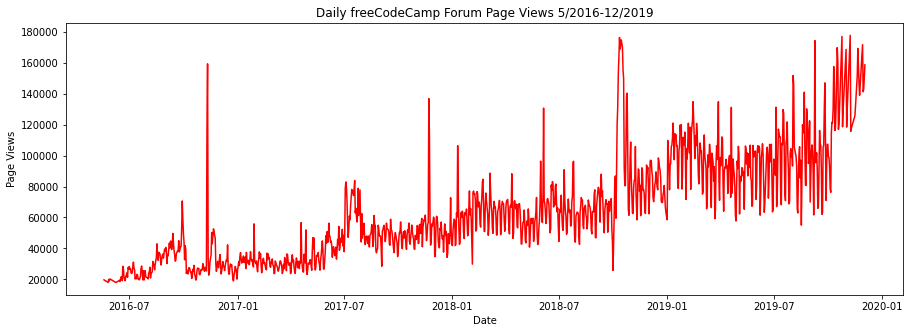

In [8]:
draw_line_plot()

#### Q4: Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [9]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    # Create a column that has the year of each date recording
    df_bar["year"] = df_bar.index.year
    # Create a column that has the month (1-12) of each date recording
    df_bar["month"] = df_bar.index.month
    # Map the month integers to their proper names
    df_bar["month"] = df_bar["month"].apply(
    lambda data: months[data-1])
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=months, ordered=True)
  
    # Draw bar plot
    df_pivot = pd.pivot_table(
    df_bar,
    values="value",
    index="year",
    columns="month",
    aggfunc=np.mean
    )

    # Plot a bar chart using the DF
    ax = df_pivot.plot(kind="bar")
    fig = ax.get_figure()
    # Change the plot dimensions (width, height)
    fig.set_size_inches(10, 8)
    # Change the axes labels
    ax.set_xlabel("Years")
    ax.set_ylabel("Average Page Views")
    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')

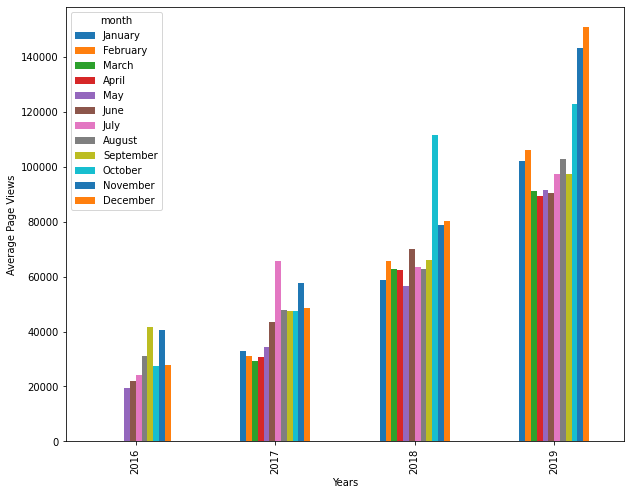

In [10]:
draw_bar_plot()

#### Q5: Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [11]:
#format data for boxplot
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

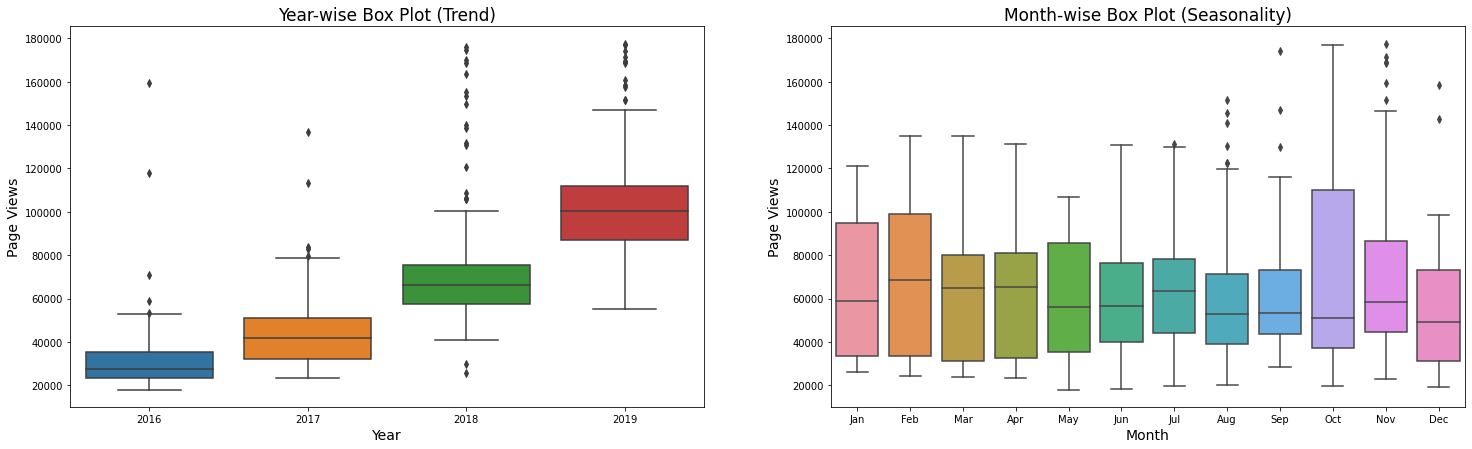

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(25,7))
sns.boxplot(x= "year", y="value", data= df_box, ax=axes[0])
sns.boxplot(x = "month", y="value", order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", 
                                           "Oct", "Nov", "Dec"], data = df_box, ax=axes[1])
axes[0].set_title("Year-wise Box Plot (Trend)", fontsize=17)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Page Views", fontsize=14)
axes[1].set_title("Month-wise Box Plot (Seasonality)", fontsize=17)
axes[1].set_xlabel("Month", fontsize=14)
axes[1].set_ylabel("Page Views", fontsize=14)